In [44]:
# import dependencies
import torch
import torchvision
# import torch
import torch.nn as nn
# import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from tkinter.ttk import Scale
from tkinter import colorchooser,filedialog,messagebox
import PIL.ImageGrab as ImageGrab
from PIL import Image
import cv2

In [26]:
# Preparing the dataset
n_epochs = 3
batch_size_train = 100 #64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 100

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [27]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [28]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([1000, 1, 28, 28])

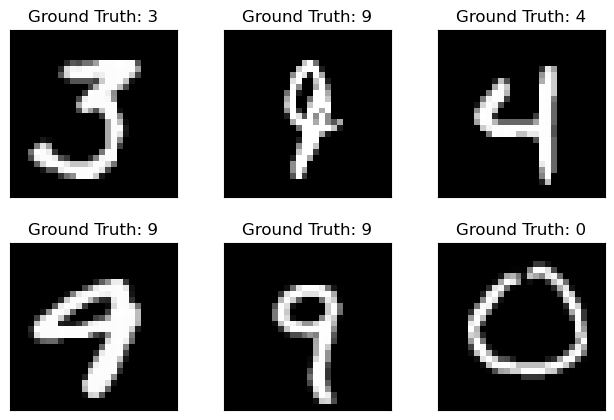

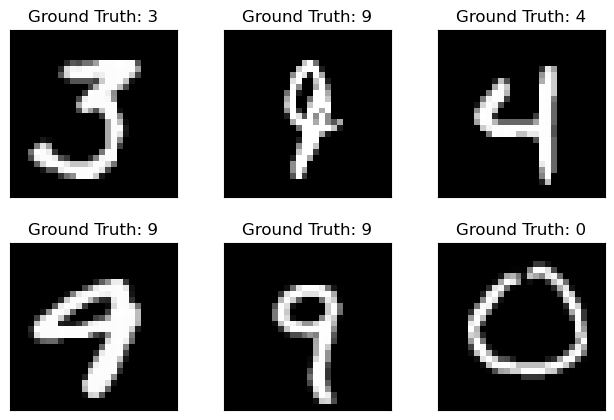

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x,dim = 1)

In [ ]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,momentum=momentum)

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
#       torch.save(network.state_dict(), '/results/model.pth')
#       torch.save(optimizer.state_dict(), '/results/optimizer.pth')

In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [39]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

C:\Users\dhano\AppData\Local\Temp\ipykernel_21852\2697125764.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.1179, Accuracy: 9615/10000 (96%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.349902
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.565388
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.307470
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.269352
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.508464
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.284181
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.314593
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.449702
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.380279
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.217587
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.168432
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.181567
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.116308
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.206791
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.246398
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.370015
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.209725
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.283141
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.419916
Train Epoch: 1 [12160

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.255512
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.273476
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.249226
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.299727
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.222388
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.102014
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.343176
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.179611
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.319167
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.246974
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.126167
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.092189
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.200672
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.281627
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.393821
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.174114
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.233269
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.199583
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.191166
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.374350


ValueError: x and y must be the same size

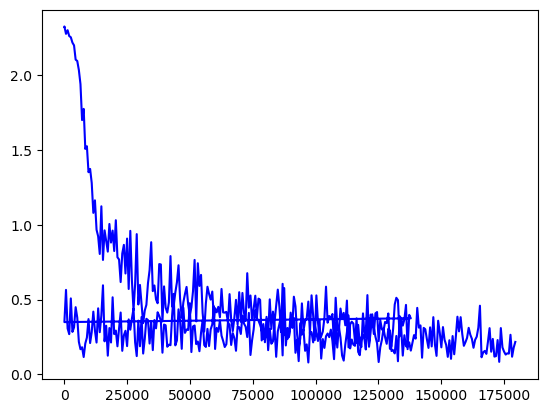

In [40]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

C:\Users\dhano\AppData\Local\Temp\ipykernel_21852\2697125764.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


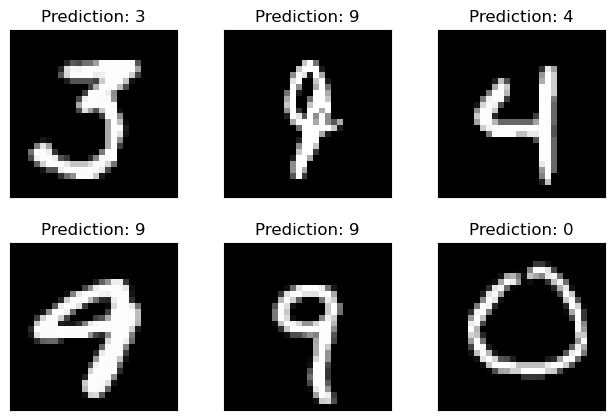

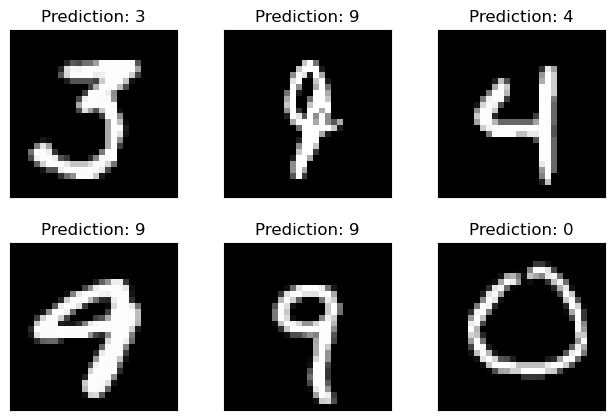

In [41]:
with torch.no_grad():
  output = network(example_data)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

In [50]:
def softmax(x):
    return np.exp(x)/(np.sum(np.exp(x),axis = 1, keepdims = True))

def identify():
    image = Image.open('temp.jpg').convert('L')
    data = 255 - np.asarray(image)
#     plt.subplot(1,2,1)
    res = cv2.resize(data, dsize=(28, 28), interpolation=cv2.INTER_AREA )
#     plt.imshow(res)
    print(type(res))
    res = res.reshape(1,28,28)/255
#     torchvision.transforms.functional.to_tensor
    res = torch.from_numpy(res).float()
    ans = network(res).detach().numpy()
    ans = softmax(ans)
    ans = np.argmax(ans)
#     print(res.shape)
#     plt.subplot(1,2,2)
#     plt.imshow(data)
#     if messagebox.askquestion("Number guesser" , "Did you draw" + str(ans)):
#         if messagebox.askretrycancel():
#             identify()
#     else:
#         if messagebox.askretrycancel("Do you want to try again"):
#             identify()
    print(ans)
identify()

<class 'numpy.ndarray'>
3


C:\Users\dhano\anaconda3\lib\site-packages\torch\nn\functional.py:1338: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "
C:\Users\dhano\AppData\Local\Temp\ipykernel_21852\2697125764.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [52]:
# Digit drawing app    
class Draw():
    def __init__(self,root):
#Defining title and Size of the Tkinter Window GUI
        self.root =root
        self.root.title("Digit Drawing Tool")
        self.root.geometry("400x350")
        self.root.configure(background="white")
        # self.root.resizable(0,0)
 
#variables for pointer and Eraser   
        self.pointer= "black"
        self.erase="white"

#Widgets for Tkinter Window
    
# Configure the alignment , font size and color of the text
        text=Text(root)
        text.tag_configure("tag_name", justify='center', font=('arial',25),background='#292826',foreground='orange')

# Insert a Text
        text.insert("1.0", "Draw only one digit (0-9)")

# Add the tag for following given text
        text.tag_add("tag_name", "1.0", "end")
        text.pack()
        
 # Erase Button and its properties   
        self.eraser_btn= Button(self.root,text="Eraser",bd=4,bg='white',command=self.eraser,width=9,relief=RIDGE)
        self.eraser_btn.place(x=0,y=40)

# Reset Button to clear the entire screen 
        self.clear_screen= Button(self.root,text="Clear Screen",bd=4,bg='white',command= lambda : self.background.delete('all'),width=9,relief=RIDGE)
        self.clear_screen.place(x=0,y=70)

# Save Button for saving the image in local computer
        self.save_btn= Button(self.root,text="Identify",bd=4,bg='white',command=self.save_drawing,width=9,relief=RIDGE)
        self.save_btn.place(x=0,y=100)

# Background Button for choosing color of the Canvas
        # self.bg_btn= Button(self.root,text="Background",bd=4,bg='white',command=self.canvas_color,width=9,relief=RIDGE)
        # self.bg_btn.place(x=0,y=287)


#Creating a Scale for pointer and eraser size
        self.pointer_frame= LabelFrame(self.root,text='size',bd=5,bg='white',font=('arial',15,'bold'),relief=RIDGE)
        self.pointer_frame.place(x=0,y=130,height=200,width=70)

        self.pointer_size =Scale(self.pointer_frame,orient=VERTICAL,from_ =48 , to =0, length=168)
        self.pointer_size.set(25)
#         self.pointer_size.grid(row=0,column=1,padx=15)

#Defining a background color for the Canvas 
        self.background = Canvas(self.root,bg='white',bd=5,relief=GROOVE,height=470,width=680)
        self.background.place(x=80,y=40)

#Bind the background Canvas with mouse click
        self.background.bind("<B1-Motion>",self.paint) 


# Functions are defined here

# Paint Function for Drawing the lines on Canvas
    def paint(self,event):       
        x1,y1 = (event.x-2), (event.y-2)  
        x2,y2 = (event.x+2), (event.y+2)  

        self.background.create_oval(x1,y1,x2,y2,fill=self.pointer,outline=self.pointer,width=self.pointer_size.get())

# Function for choosing the color of pointer  
    def select_color(self,col):
        self.pointer = col

# Function for defining the eraser
    def eraser(self):
        self.pointer= self.erase

# Function for choosing the background color of the Canvas    
    def canvas_color(self):
        color=colorchooser.askcolor()
        self.background.configure(background=color[1])
        self.erase= color[1]

# Function for saving the image file in Local Computer
    def save_drawing(self):
        try:
            # self.background update()
#             file_ss =filedialog.asksaveasfilename(defaultextension='jpg')
            #print(file_ss)
            x = self.root.winfo_rootx() + self.background.winfo_x() + 60
            #print(x, self.background.winfo_x())
            y = self.root.winfo_rooty() + self.background.winfo_y() + 55
            #print(y)
            x1= x + self.background.winfo_width() - 3*self.background.winfo_x() -90
            #print(x1)
            y1= y + self.background.winfo_height() - 2*self.background.winfo_y() -40
            #print(y1)
            ImageGrab.grab().crop((x , y, x1, y1)).save("temp.jpg")
#             messagebox.showinfo('Please wait')
            identify()
        except:
            print("Error. Please wait")

if __name__ =="__main__":
    root = Tk()
    p= Draw(root)
    root.mainloop()

<class 'numpy.ndarray'>
4


C:\Users\dhano\AppData\Local\Temp\ipykernel_21852\2697125764.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


<class 'numpy.ndarray'>
2
<class 'numpy.ndarray'>
2
<class 'numpy.ndarray'>
6
